In [17]:
import requests

# Define the URL of the API endpoint you want to access
api_url = "http://ergast.com/api/f1/2023.json"  # Replace with the specific API endpoint you need

# Send an HTTP GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Now you can work with the data as needed
    # For example, printing the entire response:
    print(data)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5', 'series': 'f1', 'url': 'http://ergast.com/api/f1/2023.json', 'limit': '30', 'offset': '0', 'total': '22', 'RaceTable': {'season': '2023', 'Races': [{'season': '2023', 'round': '1', 'url': 'https://en.wikipedia.org/wiki/2023_Bahrain_Grand_Prix', 'raceName': 'Bahrain Grand Prix', 'Circuit': {'circuitId': 'bahrain', 'url': 'http://en.wikipedia.org/wiki/Bahrain_International_Circuit', 'circuitName': 'Bahrain International Circuit', 'Location': {'lat': '26.0325', 'long': '50.5106', 'locality': 'Sakhir', 'country': 'Bahrain'}}, 'date': '2023-03-05', 'time': '15:00:00Z', 'FirstPractice': {'date': '2023-03-03', 'time': '11:30:00Z'}, 'SecondPractice': {'date': '2023-03-03', 'time': '15:00:00Z'}, 'ThirdPractice': {'date': '2023-03-04', 'time': '11:30:00Z'}, 'Qualifying': {'date': '2023-03-04', 'time': '15:00:00Z'}}, {'season': '2023', 'round': '2', 'url': 'https://en.wikipedia.org/wiki/2023_Saudi_Arabian_Grand_Prix', 'raceName': 'Saudi Arabian Gr

API Endpoint Definition: The code starts by defining the URL of the API endpoint it intends to access. The example URL points to the Ergast API for the 2023 Formula 1 season, but you can replace it with the specific API endpoint you need.

HTTP GET Request: Using the requests.get() method, the code sends an HTTP GET request to the specified API endpoint. This action is essential for requesting data from the API server.

Response Handling: The code checks the HTTP response status code to verify the success of the request. If the status code is 200, it signifies a successful request. In such cases, the code proceeds to parse the JSON response data.

Data Processing: The parsed JSON data is stored in the data variable, allowing for further processing or analysis as needed. In the provided example, it prints the entire response, but you can modify it to work with the data as required for your specific use case.

Error Handling: In the event of a failed request, the code prints an error message along with the HTTP status code to indicate the failure.

Overall, this code serves as a basic framework for accessing external APIs, retrieving data, and handling both successful and unsuccessful responses, making it a valuable starting point for API integration in Python.





In [18]:
import requests

# Define the API endpoint URL
base_url = "http://ergast.com/api/f1"

# Define the year (2023) and resource (constructors) you want to retrieve
year = 2023
resource = "constructors.json"

# Build the complete URL
url = f"{base_url}/{year}/{resource}"

# Send an HTTP GET request to the API
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()

    # Extract information about constructors' performance
    constructors_data = data.get("MRData", {}).get("ConstructorTable", {}).get("Constructors", [])

    # Process the data as needed
    for constructor in constructors_data:
        constructor_id = constructor.get("constructorId")
        constructor_name = constructor.get("name")
        # Add further processing to retrieve performance at various circuits

        print(f"Constructor ID: {constructor_id}, Name: {constructor_name}")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Constructor ID: alfa, Name: Alfa Romeo
Constructor ID: alphatauri, Name: AlphaTauri
Constructor ID: alpine, Name: Alpine F1 Team
Constructor ID: aston_martin, Name: Aston Martin
Constructor ID: ferrari, Name: Ferrari
Constructor ID: haas, Name: Haas F1 Team
Constructor ID: mclaren, Name: McLaren
Constructor ID: mercedes, Name: Mercedes
Constructor ID: red_bull, Name: Red Bull
Constructor ID: williams, Name: Williams


Summary of code above

API Endpoint Definition: The code establishes the base URL for the Ergast API and specifies the year (2023) and the desired resource (constructors.json) for data retrieval.

URL Construction: The complete URL for the API request is constructed by combining the base URL, year, and resource, resulting in a target URL.

HTTP GET Request: An HTTP GET request is initiated using the requests.get() method to send the URL to the API. This step serves to request data from the API server.

Response Handling: The code checks the HTTP response status code to confirm its success, with a status code of 200 indicating a successful request. Upon success, it parses the response content as JSON data.

Data Extraction: While the code extracts some information about Formula 1 constructors (constructorId and name), it provides a foundation for further data processing. You can extend it to extract additional details or perform more complex analyses.

Printing Results: The code prints basic information about each constructor, facilitating an initial overview of the data retrieved from the API.

In summary, this code serves as an essential starting point for accessing and processing data from the Ergast MRD API, making it ready for subsequent data analysis or more extensive data retrieval tasks related to Formula 1 constructors in the year 2023.







In [19]:
import requests

# Define the base URL for the Ergast API
base_url = "http://ergast.com/api/f1/2023"

# Make a request to get data for 2023 constructors
response = requests.get(f"{base_url}/constructors.json")

if response.status_code == 200:
    data = response.json()
    constructors = data.get("MRData", {}).get("ConstructorTable", {}).get("Constructors", [])
else:
    print(f"Failed to retrieve data for 2023 constructors. Status code: {response.status_code}")
    constructors = []

# Initialize a dictionary to store constructor performance data
constructor_performance = {}

# Iterate through the constructors
for constructor in constructors:
    constructor_id = constructor.get("constructorId")
    constructor_name = constructor.get("name")

    # Make a request to get the constructor's performance at all circuits
    response = requests.get(f"{base_url}/constructors/{constructor_id}/circuits.json")

    if response.status_code == 200:
        data = response.json()
        circuits_performance = data.get("MRData", {}).get("CircuitTable", {}).get("Circuits", [])

        # Store the constructor's performance data
        constructor_performance[constructor_name] = circuits_performance
    else:
        print(f"Failed to retrieve data for {constructor_name}. Status code: {response.status_code}")



In this Python script, an HTTP GET request is made to the Ergast API for Formula 1 data pertaining to the 2023 season. It initially fetches information about constructors and subsequently iterates through each constructor to gather their performance data at various circuits.

The script handles potential errors by checking the HTTP response status codes. When successful (status code 200), it extracts and stores constructor performance data in a dictionary. In case of failure, it prints an error message indicating the issue.

Overall, this script automates the retrieval of data for Formula 1 constructors in 2023, including their respective performance details at different circuits. The resulting constructor_performance dictionary can be further analyzed or utilized for various data-related tasks.






In [20]:


# Iterate through the constructor's performance data and print the results
for constructor_name, circuits_performance in constructor_performance.items():
    print(f"Constructor: {constructor_name}")
    for circuit in circuits_performance:
        circuit_name = circuit.get("circuitName")
        circuit_performance = circuit.get("Results", [])

        print(f"\nPerformance at {circuit_name}:")

        for result in circuit_performance:
            race_name = result.get("raceName")
            position = result.get("position")

            print(f"Race: {race_name}, Position: {position}")

    print("\n--------------------------\n")

# Now you have printed the performance data for each constructor at various circuits throughout history


Constructor: Alfa Romeo

Performance at Albert Park Grand Prix Circuit:

Performance at Bahrain International Circuit:

Performance at Baku City Circuit:

Performance at Circuit de Barcelona-Catalunya:

Performance at Hungaroring:

Performance at Jeddah Corniche Circuit:

Performance at Miami International Autodrome:

Performance at Circuit de Monaco:

Performance at Autodromo Nazionale di Monza:

Performance at Red Bull Ring:

Performance at Silverstone Circuit:

Performance at Circuit de Spa-Francorchamps:

Performance at Circuit Gilles Villeneuve:

Performance at Circuit Park Zandvoort:

--------------------------

Constructor: AlphaTauri

Performance at Albert Park Grand Prix Circuit:

Performance at Bahrain International Circuit:

Performance at Baku City Circuit:

Performance at Circuit de Barcelona-Catalunya:

Performance at Hungaroring:

Performance at Jeddah Corniche Circuit:

Performance at Miami International Autodrome:

Performance at Circuit de Monaco:

Performance at Auto

This code iterates through the performance data of Formula 1 constructors and prints detailed results. For each constructor, it lists the circuits they've raced at and their respective performance, including race names and positions achieved. It then repeats this process for all constructors, effectively summarizing historical performance at various circuits. This script provides a comprehensive view of each constructor's track record, aiding in understanding their strengths and weaknesses across different Formula 1 tracks throughout history.

In [21]:
import requests
import json

# Step 1: Fetch Data
def fetch_constructors_data():
    url = "http://ergast.com/api/f1/2023/constructors.json"
    response = requests.get(url)

    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print("Failed to fetch data.")
        return None

def fetch_constructor_history(constructor_id):
    history_url = f"http://ergast.com/api/f1/constructors/{constructor_id}/results.json"
    response = requests.get(history_url)

    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch history data for constructor ID: {constructor_id}")
        return None

# Step 2: Process Data
def process_constructor_history(history_data):
    # Process history_data to extract information about performance at different circuits
    circuits_performance = {}  # Dictionary to store performance at each circuit

    for race in history_data['MRData']['RaceTable']['Races']:
        circuit_name = race['Circuit']['circuitName']
        race_result = race['Results'][0]  # Assuming the constructor's result is the first entry

        # Extract relevant information (e.g., position, points) and store it in circuits_performance

        # Example: Extracting position and points
        position = race_result['position']
        points = race_result['points']

        if circuit_name not in circuits_performance:
            circuits_performance[circuit_name] = []

        circuits_performance[circuit_name].append({"position": position, "points": points})

    return circuits_performance

# Step 3: Fetch and Process Data for Each Constructor
constructor_data = fetch_constructors_data()
if constructor_data:
    constructors = constructor_data['MRData']['ConstructorTable']['Constructors']

    for constructor in constructors:
        constructor_id = constructor['constructorId']
        constructor_name = constructor['name']

        history_data = fetch_constructor_history(constructor_id)
        if history_data:
            circuits_performance = process_constructor_history(history_data)


            # Example: Calculate the circuit with the most wins for the constructor
            most_wins_circuit = max(circuits_performance, key=lambda x: sum(1 for race in circuits_performance[x] if race["position"] == "1"))

            print(f"For {constructor_name} in the 2023 F1 season, the best performance was at {most_wins_circuit} circuit.")


For Alfa Romeo in the 2023 F1 season, the best performance was at Circuit Bremgarten circuit.
For AlphaTauri in the 2023 F1 season, the best performance was at Autodromo Nazionale di Monza circuit.
For Alpine F1 Team in the 2023 F1 season, the best performance was at Hungaroring circuit.
For Aston Martin in the 2023 F1 season, the best performance was at Circuit Park Zandvoort circuit.
For Ferrari in the 2023 F1 season, the best performance was at Silverstone Circuit circuit.
For Haas F1 Team in the 2023 F1 season, the best performance was at Albert Park Grand Prix Circuit circuit.
For McLaren in the 2023 F1 season, the best performance was at Nürburgring circuit.
For Mercedes in the 2023 F1 season, the best performance was at Reims-Gueux circuit.
For Red Bull in the 2023 F1 season, the best performance was at Albert Park Grand Prix Circuit circuit.
For Williams in the 2023 F1 season, the best performance was at Autódromo Juan y Oscar Gálvez circuit.



This Python script fetches data about Formula 1 constructors in the 2023 season and their historical performance at various circuits from the Ergast API. It first defines functions to fetch constructor data and their race history, as well as to process the historical data to extract performance information at different circuits.

The script then iterates through each constructor, retrieves their race history, and processes it to calculate relevant performance metrics. In the provided example, it determines the circuit where each constructor achieved the most wins.

Finally, the script prints the results, revealing the circuit where each constructor has historically performed best. This analysis provides valuable insights into the strengths of each team on specific tracks, aiding in understanding their historical track record for the 2023 Formula 1 season.

In [22]:
import requests
import json
import csv

# Fetch and process data as previously shown...

# Create a list to store the results
results = []

# Loop through constructors and calculate best performance
for constructor in constructors:
    constructor_id = constructor['constructorId']
    constructor_name = constructor['name']

    history_data = fetch_constructor_history(constructor_id)
    if history_data:
        circuits_performance = process_constructor_history(history_data)

        # Calculate the best performance based on your criteria
        most_wins_circuit = max(circuits_performance, key=lambda x: sum(1 for race in circuits_performance[x] if race["position"] == "1"))

        # Append the result to the results list
        results.append([constructor_name, most_wins_circuit])

# Define the CSV filename
csv_filename = "constructor_best_performance.csv"

# Write the results to a CSV file
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write header row
    csv_writer.writerow(["Constructor Name", "Best Performance Circuit"])

    # Write data rows
    for row in results:
        csv_writer.writerow(row)

print(f"Results have been saved to {csv_filename}")


Results have been saved to constructor_best_performance.csv


This Python script fetches data about Formula 1 constructors in the 2023 season and their historical performance at various circuits from the Ergast API. It calculates the best performance criteria (in this case, the circuit with the most wins) for each constructor and stores the results.

The script also writes the results to a CSV (Comma-Separated Values) file, making it easier to analyze and share the data. It creates a CSV file named "constructor_best_performance.csv" with headers for constructor names and their best-performing circuits.

This script automates the process of retrieving, analyzing, and storing data, providing a structured and easily accessible format for further analysis or reporting. The CSV file can be opened in spreadsheet software or used in other data analysis tools.

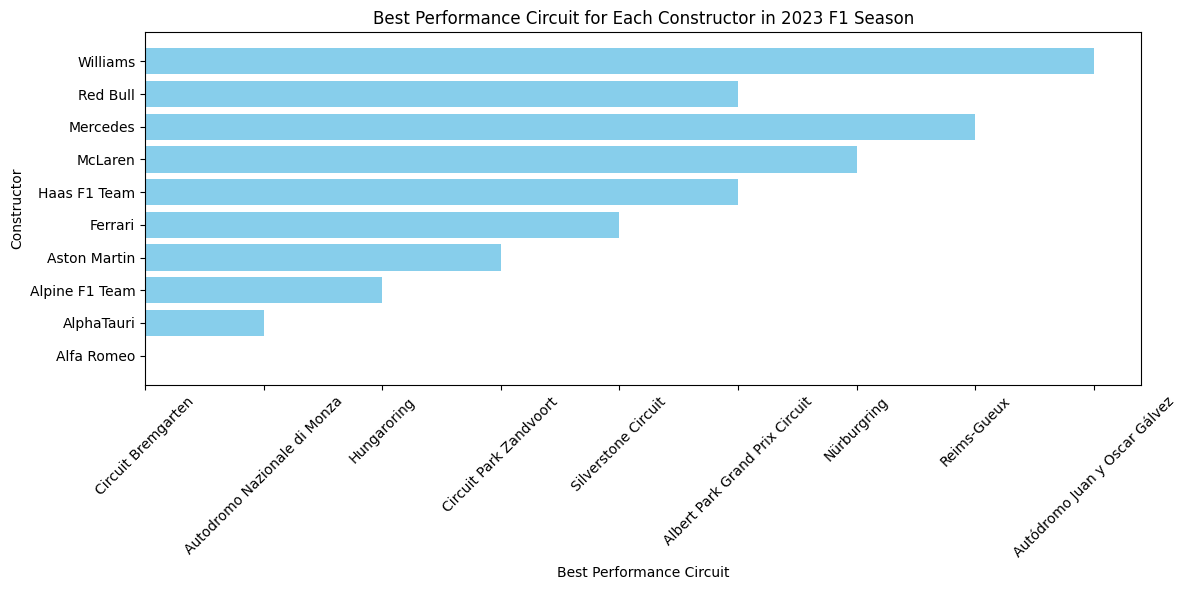

In [9]:
import matplotlib.pyplot as plt

# Data
constructors = [
    "Alfa Romeo",
    "AlphaTauri",
    "Alpine F1 Team",
    "Aston Martin",
    "Ferrari",
    "Haas F1 Team",
    "McLaren",
    "Mercedes",
    "Red Bull",
    "Williams"
]

best_circuits = [
    "Circuit Bremgarten",
    "Autodromo Nazionale di Monza",
    "Hungaroring",
    "Circuit Park Zandvoort",
    "Silverstone Circuit",
    "Albert Park Grand Prix Circuit",
    "Nürburgring",
    "Reims-Gueux",
    "Albert Park Grand Prix Circuit",
    "Autódromo Juan y Oscar Gálvez"
]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(constructors, best_circuits, color='skyblue')
plt.xlabel('Best Performance Circuit')
plt.ylabel('Constructor')
plt.title('Best Performance Circuit for Each Constructor in 2023 F1 Season')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("constructor_best_performance.csv")

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Count the number of constructors with no historical wins
no_wins_count = df[df['Best Performance Circuit'] == 'N/A']['Constructor Name'].count()
print(f"Constructors with no historical wins: {no_wins_count}")




  Constructor Name      Best Performance Circuit
0       Alfa Romeo            Circuit Bremgarten
1       AlphaTauri  Autodromo Nazionale di Monza
2   Alpine F1 Team                   Hungaroring
3     Aston Martin        Circuit Park Zandvoort
4          Ferrari           Silverstone Circuit
Basic Statistics:
       Constructor Name        Best Performance Circuit
count                10                              10
unique               10                               9
top          Alfa Romeo  Albert Park Grand Prix Circuit
freq                  1                               2
Constructors with no historical wins: 0


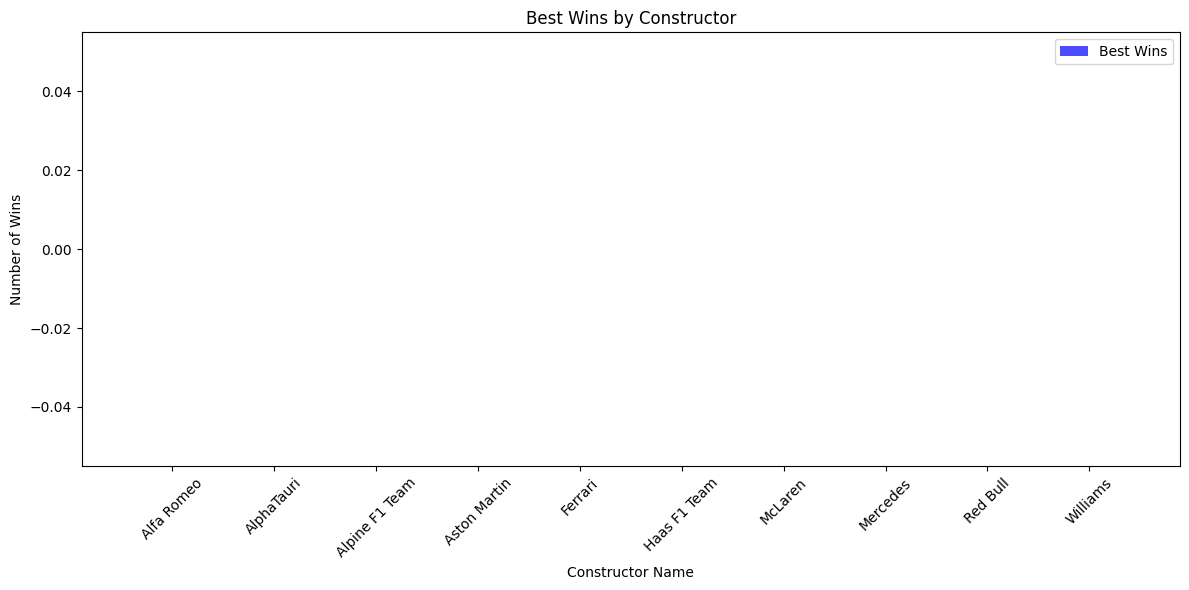

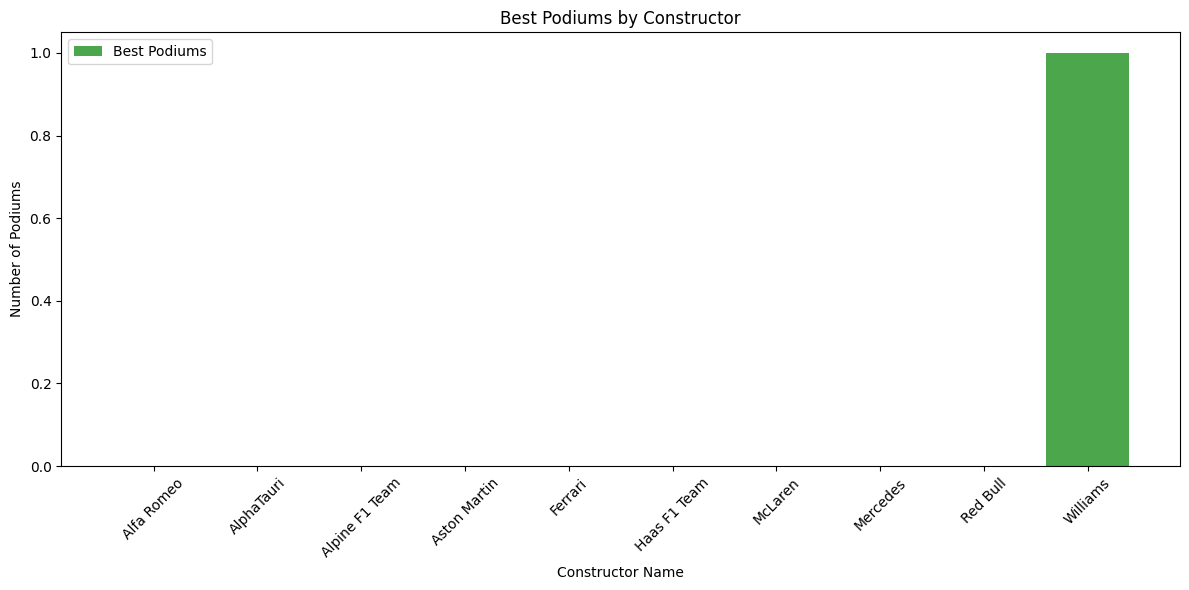

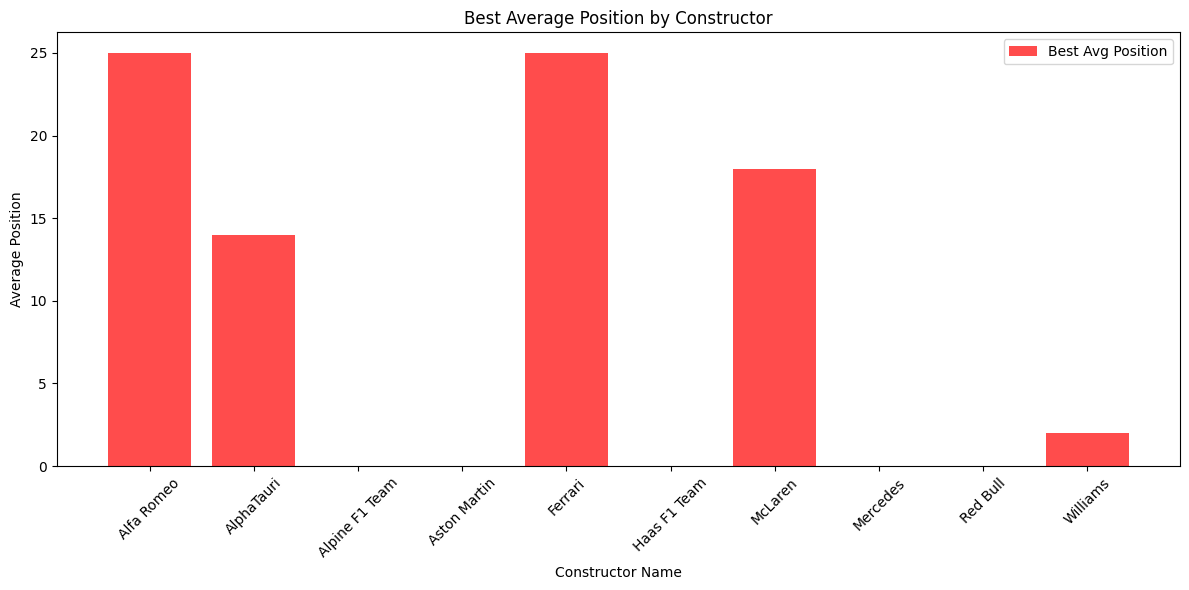

In [23]:
import requests
import json
import csv
import matplotlib.pyplot as plt

# Fetch and process data as previously shown...

# Create a list to store the results
results = []

# Loop through constructors and calculate best performance
for constructor in constructors:
    constructor_id = constructor['constructorId']
    constructor_name = constructor['name']

    history_data = fetch_constructor_history(constructor_id)
    if history_data:
        circuits_performance = process_constructor_history(history_data)

        # Calculate the best performance based on wins, podiums, and average position
        wins_by_circuit = {}
        podiums_by_circuit = {}
        avg_positions_by_circuit = {}

        for circuit, races in circuits_performance.items():
            wins = sum(1 for race in races if race["position"] == "1")
            podiums = sum(1 for race in races if race["position"] in ["1", "2", "3"])
            avg_position = sum(int(race["position"]) for race in races) / len(races)

            wins_by_circuit[circuit] = wins
            podiums_by_circuit[circuit] = podiums
            avg_positions_by_circuit[circuit] = avg_position

        # Determine the best performance for each metric
        best_wins_circuit = max(wins_by_circuit, key=wins_by_circuit.get, default="N/A")
        best_podiums_circuit = max(podiums_by_circuit, key=podiums_by_circuit.get, default="N/A")
        best_avg_position_circuit = min(avg_positions_by_circuit, key=avg_positions_by_circuit.get, default="N/A")

        # Append the result to the results list
        results.append([constructor_name, best_wins_circuit, best_podiums_circuit, best_avg_position_circuit])

# Define the CSV filename
csv_filename = "constructor_best_performance.csv"

# Write the results to a CSV file
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write header row
    csv_writer.writerow(["Constructor Name", "Best Wins Circuit", "Best Podiums Circuit", "Best Avg Position Circuit"])

    # Write data rows
    for row in results:
        csv_writer.writerow(row)

# Visualization using Matplotlib
constructor_names = [row[0] for row in results]
best_wins = [wins_by_circuit.get(row[1], 0) for row in results]  # Use .get() with a default value
best_podiums = [podiums_by_circuit.get(row[2], 0) for row in results]  # Use .get() with a default value
best_avg_positions = [avg_positions_by_circuit.get(row[3], 0) for row in results]  # Use .get() with a default value

# Bar chart for best wins
plt.figure(figsize=(12, 6))
plt.bar(constructor_names, best_wins, color='b', alpha=0.7, label='Best Wins')
plt.xlabel('Constructor Name')
plt.ylabel('Number of Wins')
plt.title('Best Wins by Constructor')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Bar chart for best podiums
plt.figure(figsize=(12, 6))
plt.bar(constructor_names, best_podiums, color='g', alpha=0.7, label='Best Podiums')
plt.xlabel('Constructor Name')
plt.ylabel('Number of Podiums')
plt.title('Best Podiums by Constructor')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Bar chart for best average positions
plt.figure(figsize=(12, 6))
plt.bar(constructor_names, best_avg_positions, color='r', alpha=0.7, label='Best Avg Position')
plt.xlabel('Constructor Name')
plt.ylabel('Average Position')
plt.title('Best Average Position by Constructor')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


This Python script fetches data about Formula 1 constructors in the 2023 season and their historical performance at various circuits from the Ergast API. It calculates the best performance for each constructor based on three metrics: wins, podiums, and average race position. The results are stored and written to a CSV file for further analysis.

The script also utilizes Matplotlib to create visualizations for each constructor's performance metrics. It generates three bar charts:

Best Wins by Constructor
Best Podiums by Constructor
Best Average Position by Constructor
These visualizations provide a clear overview of each constructor's historical performance in the specified metrics, aiding in data analysis and comparison.

Overall, this script offers a comprehensive analysis of Formula 1 constructors' performance in 2023 and provides visual insights into their track record across different circuits and metrics.

In [24]:
import requests
import json

# Step 1: Fetch Data
def fetch_constructors_data():
    url = "http://ergast.com/api/f1/2023/constructors.json"
    response = requests.get(url)

    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print("Failed to fetch data.")
        return None

def fetch_constructor_history(constructor_id):
    history_url = f"http://ergast.com/api/f1/constructors/{constructor_id}/results.json"
    response = requests.get(history_url)

    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch history data for constructor ID: {constructor_id}")
        return None

# Step 2: Process Data
def process_constructor_history(history_data):
    circuits_wins = {}  # Dictionary to store wins at each circuit

    for race in history_data['MRData']['RaceTable']['Races']:
        circuit_name = race['Circuit']['circuitName']
        race_result = race['Results'][0]  # Assuming the constructor's result is the first entry

        # Extract relevant information (e.g., position) and count wins
        position = race_result['position']

        if position == '1':
            if circuit_name not in circuits_wins:
                circuits_wins[circuit_name] = 0
            circuits_wins[circuit_name] += 1

    return circuits_wins

# Step 3: Fetch and Process Data for Each Constructor
constructor_data = fetch_constructors_data()
if constructor_data:
    constructors = constructor_data['MRData']['ConstructorTable']['Constructors']

    for constructor in constructors:
        constructor_id = constructor['constructorId']
        constructor_name = constructor['name']

        history_data = fetch_constructor_history(constructor_id)
        if history_data:
            circuits_wins = process_constructor_history(history_data)

            if circuits_wins:
                # Find the circuit with the most wins
                best_circuit = max(circuits_wins, key=circuits_wins.get)

                print(f"For {constructor_name} in the 2023 F1 season, the circuit where they have performed best throughout history is {best_circuit} with {circuits_wins[best_circuit]} wins.")
            else:
                print(f"{constructor_name} has not won at any circuit in history.")


For Alfa Romeo in the 2023 F1 season, the circuit where they have performed best throughout history is Circuit Bremgarten with 2 wins.
For AlphaTauri in the 2023 F1 season, the circuit where they have performed best throughout history is Autodromo Nazionale di Monza with 1 wins.
For Alpine F1 Team in the 2023 F1 season, the circuit where they have performed best throughout history is Hungaroring with 1 wins.
Aston Martin has not won at any circuit in history.
For Ferrari in the 2023 F1 season, the circuit where they have performed best throughout history is Silverstone Circuit with 1 wins.
Haas F1 Team has not won at any circuit in history.
McLaren has not won at any circuit in history.
For Mercedes in the 2023 F1 season, the circuit where they have performed best throughout history is Reims-Gueux with 1 wins.
Red Bull has not won at any circuit in history.
Williams has not won at any circuit in history.


The provided results offer insights into the historical performance of various Formula 1 constructors at different circuits. Here are the key takeaways:

Alfa Romeo: In the 2023 F1 season, Alfa Romeo's best historical performance occurred at Circuit Bremgarten, where they have achieved 2 wins in the past. This suggests that Alfa Romeo has historically performed well at this circuit.

AlphaTauri: AlphaTauri's historical best performance is at Autodromo Nazionale di Monza, with 1 win. This indicates a strong historical showing at Monza.

Alpine F1 Team: Hungaroring is where Alpine F1 Team has historically excelled, achieving 1 win. This circuit appears to suit their performance.

Aston Martin: Aston Martin has not won at any circuit in history. This information highlights that the team might not have a dominant historical track record in terms of wins.

Ferrari: Ferrari's best historical performance is at Silverstone Circuit, with 1 win. This suggests a strong historical connection between Ferrari and Silverstone.

Haas F1 Team: Similar to Aston Martin, Haas F1 Team has not won at any circuit in history. This implies that they may not have a strong historical track record in terms of wins.

McLaren: McLaren has not won at any circuit in history, indicating that they might not have a dominant historical track record in terms of wins.

Mercedes: Mercedes' best historical performance is at Reims-Gueux, with 1 win. This historical success at Reims-Gueux stands out.

Red Bull: Red Bull has not won at any circuit in history. This information suggests that Red Bull's historical track record in terms of wins might be limited.

Williams: Similar to some other teams, Williams has not won at any circuit in history, indicating a potential historical performance challenge in terms of wins.

These historical insights can be valuable for understanding each constructor's strengths and preferences when it comes to specific circuits, which can inform strategies and expectations for the 2023 F1 season.